<a href="https://colab.research.google.com/github/AIMosta/All-About-AI-Python-Edition/blob/master/Course%205-Ensemble%20Learning/AAA_ped_w5_c3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://docs.google.com/uc?export=download&id=1ap18raVTUCSJeGzTLz9kViroFGvTknrV">
#  Ensemble Leaning: Random Forests

>[Supervised Learning: Introduction to Supervised Learning](#scrollTo=b9q-VxEW5tRs&uniqifier=1)

>[1- Random Forest](#scrollTo=1oBho425Q7ca&uniqifier=1)

>>[Concept](#scrollTo=yLvtrsm0RcWq&uniqifier=1)

>>[Random Forest in sklearn : method 1](#scrollTo=A8DvRRWlRdGi&uniqifier=1)

>>[Random Forest in sklearn: method 2](#scrollTo=OjzIaOe1RdZ2&uniqifier=1)

>[2- Extreme Random Forest](#scrollTo=VL49qQMiRCfC&uniqifier=1)

>>[Concept](#scrollTo=QtI6YjSJRzo8&uniqifier=1)

>>[Example](#scrollTo=Tg2exEipRz7w&uniqifier=1)

>>[Out of bag score](#scrollTo=lYnbKQUdR0Ou&uniqifier=1)

>[3-  Balanced Random Forests](#scrollTo=Nhm8OJc_RFU8&uniqifier=1)

>>[Concept](#scrollTo=TOgMnI_CR7QE&uniqifier=1)

>>[Example without balancing](#scrollTo=iJCObGCDR7Wk&uniqifier=1)

>>[Same example with balancing](#scrollTo=Zd06of0ZR7JC&uniqifier=1)

>[4- GridSearch](#scrollTo=Ca8Ofrs7RHwC&uniqifier=1)

>>[Concept](#scrollTo=157T7zEfSB_u&uniqifier=1)

>>[Example results](#scrollTo=xn8bZSmqSBwY&uniqifier=1)

>>[Best result visualization](#scrollTo=ArfuFPFFSB4a&uniqifier=1)

>[5- Features importance](#scrollTo=5aXVjrUrRNGi&uniqifier=1)

>>[Concept](#scrollTo=H71qigLHSGU2&uniqifier=1)

>>[Visualization of the features importance](#scrollTo=yMgLDZAdSGjG&uniqifier=1)

>>[Comparison of results](#scrollTo=Z7prBx0pSGbS&uniqifier=1)

>[6-Balancing with resampling](#scrollTo=CffbTqAERQKg&uniqifier=1)

>>[Concept](#scrollTo=23ma5K3xSKrS&uniqifier=1)

>>[Example](#scrollTo=WIGdB_nfSK9o&uniqifier=1)

>[References](#scrollTo=tSbN2yDrRSdW&uniqifier=1)



# 1- Random Forest

## Concept
* A **Random Forest**  is  an **ensemble learning** method composed only of ** Decision Trees**.  They are **trained on different random subsets ** of training data (with or without replacement). To split a  node, the trees select the best features from a **random subset** of features .

## Random Forest in sklearn : method 1

* Using a **Bagging Classifier**: since a random forest is a special case, of a bagging method. We can use a Bagging Classifier with decision trees as estimator.

In [0]:
#import iris plant datasets tools
from sklearn.datasets import load_iris

%matplotlib inline

import matplotlib.pyplot as plt


# import numpy
import numpy as np

#import train_test_split from model_selection
from sklearn.model_selection import train_test_split

# import the confusion matrix and classification 
# report
from sklearn.metrics import confusion_matrix, classification_report



In [0]:
# load the data
myIris = load_iris()
X = myIris.data
y = myIris.target
x_train,x_test,y_train,y_test= train_test_split(X, y, test_size=0.25)
print(x_train.shape)


(112, 4)


In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
myEstimator= DecisionTreeClassifier(splitter="random",max_features="auto",max_depth=4)
myRF1 = BaggingClassifier(myEstimator,n_estimators=500, 
                           max_samples=1.0, bootstrap=True, n_jobs=-1,oob_score=True)

myRF1.fit(x_train,y_train)
y_pred= myRF1.predict(x_test)
print("Confusion matrix = \n",confusion_matrix(y_test,y_pred))
print("score=", np.round(myRF1.score(x_test,y_test),2))
print("Out of bag score:", np.round(myRF1.oob_score_,2))

Confusion matrix = 
 [[14  0  0]
 [ 0 12  1]
 [ 0  1 10]]
score= 0.95
Out of bag score: 0.96


## Random Forest in sklearn: method 2

* Using the  random forest classifier class.  in sklearn, the size of the samples used in the trees is the same as the original data size.


In [0]:
from sklearn.ensemble import RandomForestClassifier

myRF2= RandomForestClassifier(n_estimators=500, n_jobs=-1,max_depth=4,oob_score=True)
myRF2.fit(x_train, y_train)
y_pred = myRF2.predict(x_test)

print("Confusion matrix = \n",confusion_matrix(y_test,y_pred))
print("score=", np.round(myRF2.score(x_test,y_test),2))
print("Out of bag score:", np.round(myRF2.oob_score_,2))

Confusion matrix = 
 [[14  0  0]
 [ 0 12  1]
 [ 0  1 10]]
score= 0.95
Out of bag score: 0.96


# 2- Extreme Random Forest




## Concept
* In **Extreme random forests**, the **thresholds** used in the decision trees are **selected randomly**, instead of choosing the best one.

* They are also called “**Extremely randomized Trees**” or “**Extra Trees**”.

* In sklearn, they are: “**ExtraTreesClassifier**” and “**ExtraTreesRegeressor**”.

* “ExtraTree**s**Classifier" are random forests, but there is in sklearn “ExtraTreeClassifier” which is a decision tree and not a forest.

## Example

In [0]:
from sklearn.tree import ExtraTreeClassifier

myEstimator2= ExtraTreeClassifier(splitter="random",max_features="auto",max_depth=4)
myERF1 = BaggingClassifier(myEstimator2,n_estimators=500, 
                           max_samples=1.0, bootstrap=True, n_jobs=-1,oob_score=True)

myERF1.fit(x_train,y_train)
y_pred = myERF1.predict(x_test)

print("Confusion matrix = \n",confusion_matrix(y_test,y_pred))
print("score=", np.round(myERF1.score(x_test,y_test),2))
print("Out of bag score:", np.round(myERF1.oob_score_,2))

Confusion matrix = 
 [[14  0  0]
 [ 0 12  1]
 [ 0  1 10]]
score= 0.95
Out of bag score: 0.96


In [0]:
from sklearn.ensemble import ExtraTreesClassifier

myERF2= ExtraTreesClassifier(n_estimators=500, n_jobs=-1,max_depth=4,oob_score=True,bootstrap=True)
myERF2.fit(x_train, y_train)
y_pred = myERF2.predict(x_test)

print("Confusion matrix = \n",confusion_matrix(y_test,y_pred))
print("score=", np.round(myERF2.score(x_test,y_test),2))
print("Out of bag score:", np.round(myERF2.oob_score_,2))

Confusion matrix = 
 [[14  0  0]
 [ 0 12  1]
 [ 0  1 10]]
score= 0.95
Out of bag score: 0.96


## Out of bag score
* The bag refers to the training samples selected and used by a predictor in a bagging method.
* The out of bag, are the remaining samples.
* For each predictor, it is possible to compute its score using its out of bag samples.
* At the end of the training, the average of all these scores will represent the “out of bag score” of the learning method.
* In sklearn, you have to specify: “oob_score =True” as parameter of the bagging method.


In [0]:
for RF in [myRF1,myRF2, myERF1,myERF2]:
  print(np.round(RF.oob_score_,2))

0.96
0.96
0.96
0.96


# 3-  Balanced Random Forests

## Concept


* Sometimes, in classification, the representation of your classes in the training data is “unbalanced”. For example, in a binary classification, you can have a big number of samples belonging to the first class. And, only few samples related to the other one.

* In this case, the learning method will not be able to classifiy correctly.

* To avoid this situation, scikit-learn allow us to define a parameter called: class_weight, with a special value: “balanced” ==> it will attribute bigger weights for less present classes.

* The formula is as follow: $\frac {n_{samples}} { (n_{classes} * np.bincount(y)) }$ 

## Example without balancing
 
* We will apply unbalanced data from [Artificial Intelligence With Python Github Repository](https://github.com/PacktPublishing/Artificial-Intelligence-with-Python). And then, we will apply our Random Forest method.
* We will also use only **two features**,  for visulaization purposes.
* In this section, we are going to use the library "**yellowbrick**" to ** train** and **visualize** our classification.
* After installation, you will have to **res** the runtime, install it again and use it.

In [0]:
# data downloaded from (https://github.com/PacktPublishing/Artificial-Intelligence-with-Python)
!git clone https://github.com/AIMosta/AAA-Ped-Week5.git

Cloning into 'AAA-Ped-Week5'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 1), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [0]:
 
from pandas import DataFrame as DF, Series as S
import pandas as pd
myData = pd.read_csv("AAA-Ped-Week5/A3P-w5-data_imbalance.txt", header = -1)

x2= myData.iloc[:,[0,1]].values
y2= myData.iloc[:,2].values

In [0]:
x2_train,x2_test,y2_train,y2_test= train_test_split(x2, y2, test_size=0.25)
print(x2_train.shape)

(1125, 2)


In [0]:
# installation of yellowbrick libray
# it is build upon scickit-learn models
!pip install yellowbrick

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class DecisionBoundariesVisualizer is deprecated; Will be moved to yellowbrick.contrib in v0.8
  warnings.warn(msg, category=DeprecationWarning)


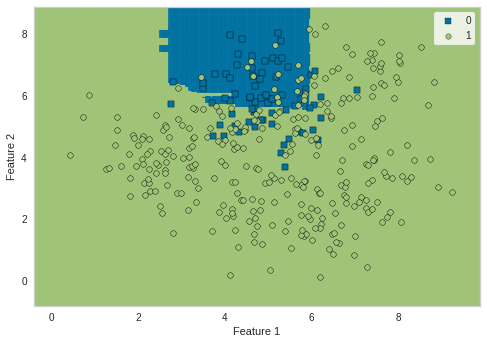

In [0]:

from yellowbrick.contrib.classifier import DecisionViz


myRF2= RandomForestClassifier(n_estimators=100, n_jobs=-1,oob_score=True, max_depth=4,
                               )
myUVis = DecisionViz(myRF2,"Unbalanced Learning",features = ["Feature 1","Feature 2"],
                    classes = [0,1])


myUVis.fit(x2_train,y2_train)
myUVis.draw(x2_test, y2_test)
myUVis.poof(outpath="unbalanced.png")

 

In [0]:
print(classification_report(y2_test,myRF2.predict(x2_test)))

              precision    recall  f1-score   support

           0       0.69      0.56      0.62        72
           1       0.90      0.94      0.92       303

   micro avg       0.87      0.87      0.87       375
   macro avg       0.79      0.75      0.77       375
weighted avg       0.86      0.87      0.86       375



## Same example with balancing

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class DecisionBoundariesVisualizer is deprecated; Will be moved to yellowbrick.contrib in v0.8
  warnings.warn(msg, category=DeprecationWarning)


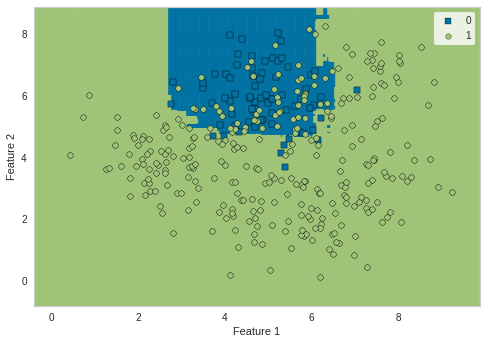

In [0]:

myBRF2= RandomForestClassifier(n_estimators=100, n_jobs=-1,oob_score=True, max_depth=4,
                               class_weight="balanced")
myVis = DecisionViz(myBRF2,"Balanced Learning",features = ["Feature 1","Feature 2"],
                    classes = [0,1])


myVis.fit(x2_train,y2_train)
myVis.draw(x2_test, y2_test)
myVis.poof(outpath="balanced.png")


In [0]:
print(classification_report(y2_test,myBRF2.predict(x2_test)))

              precision    recall  f1-score   support

           0       0.52      0.88      0.65        72
           1       0.96      0.81      0.88       303

   micro avg       0.82      0.82      0.82       375
   macro avg       0.74      0.84      0.76       375
weighted avg       0.88      0.82      0.83       375



# 4- GridSearch

* **GridSearch** is a tool used to test a learning model with a list of dictionaries  containing different parameters.
* We will use it to find the best parameters for a **Random Forest** method. We will apply it on the already used iris data.

* The grid will act as a **container** for the classifier. Like, the classifier of yellowbrick did earlier.

## Concept

In [0]:
# variate n_estimators, max_depth; and min_samples_leaf
myGrid = [ {'n_estimators': [20,40,60], "min_samples_leaf":[1,2,3]},
          { 'n_estimators': [10,20,30,40],'max_depth': [1,2,3]}
          ]

from sklearn.model_selection import GridSearchCV
# A grid search instanciation using a Random Forest classifier
myEstimator = RandomForestClassifier()
myClassifier = GridSearchCV(estimator= myEstimator,
     param_grid= myGrid)
myClassifier.fit(x_train, y_train)
y_pred= myClassifier.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Example results

* Printing the results is related to the **scikit learn** libray versions. Be avare, that when installing the current  "**yellowbrick**" , it will automatically upgrade scikit-learn to 20.1 version.


In [0]:
# working with version 20.1
print("\nThe obtained scores are:")  
for i in range(21):
  params = myClassifier.cv_results_["params"][i]
  score = myClassifier.cv_results_["mean_test_score"][i]
  print(params , "==>", np.round(score,3))
  
print("The best parameters are :", myClassifier.best_params_)



The obtained scores are:
{'min_samples_leaf': 1, 'n_estimators': 20} ==> 0.964
{'min_samples_leaf': 1, 'n_estimators': 40} ==> 0.964
{'min_samples_leaf': 1, 'n_estimators': 60} ==> 0.964
{'min_samples_leaf': 2, 'n_estimators': 20} ==> 0.973
{'min_samples_leaf': 2, 'n_estimators': 40} ==> 0.973
{'min_samples_leaf': 2, 'n_estimators': 60} ==> 0.964
{'min_samples_leaf': 3, 'n_estimators': 20} ==> 0.973
{'min_samples_leaf': 3, 'n_estimators': 40} ==> 0.973
{'min_samples_leaf': 3, 'n_estimators': 60} ==> 0.964
{'max_depth': 1, 'n_estimators': 10} ==> 0.946
{'max_depth': 1, 'n_estimators': 20} ==> 0.955
{'max_depth': 1, 'n_estimators': 30} ==> 0.964
{'max_depth': 1, 'n_estimators': 40} ==> 0.955
{'max_depth': 2, 'n_estimators': 10} ==> 0.955
{'max_depth': 2, 'n_estimators': 20} ==> 0.964
{'max_depth': 2, 'n_estimators': 30} ==> 0.964
{'max_depth': 2, 'n_estimators': 40} ==> 0.973
{'max_depth': 3, 'n_estimators': 10} ==> 0.964
{'max_depth': 3, 'n_estimators': 20} ==> 0.964
{'max_depth': 3, '

## Best result visualization

* We will use **yellowbrick** to visualize the confusion matrix  using the best parameters.

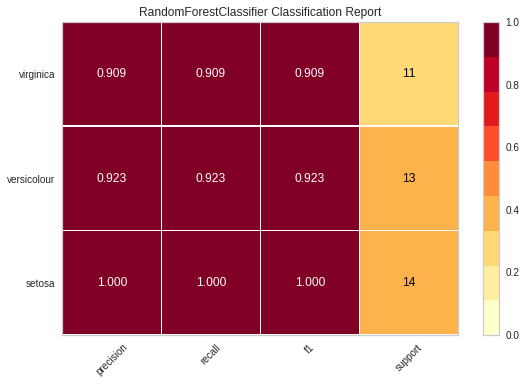

In [0]:
from yellowbrick.classifier import ConfusionMatrix
myEstimator= RandomForestClassifier(min_samples_leaf=2,n_estimators= 20)
myVisualizer = ClassificationReport(myEstimator, classes=["setosa","versicolour","virginica"],
                                   support=True)
myVisualizer.fit(x_train,y_train)
myVisualizer.score(x_test,y_test)
myVisualizer.poof(outpath="Confusion_matrix.png")  


# 5- Features importance

## Concept

* The **features** in a data set have **not** the **same importance**.
* In a **decision tree**, this importance can be deduced from the **distance** between the **appearance** of a feature in a **decision node ** and the** root**.
* In a **random forest**, the **average** of the distances corresponding to **each tree** will represent the **feature’s importance**.
* **Scikit-learn** implements this method.


In [0]:
# we will use the previous trained estimator

for feature, importance in zip(myIris["feature_names"], myEstimator.feature_importances_):
  print(feature,'==>' , np.round(importance,5))


sepal length (cm) ==> 0.07181
sepal width (cm) ==> 0.00342
petal length (cm) ==> 0.3492
petal width (cm) ==> 0.57557


## Visualization of the features importance

* we will use again **yellowbricke** for visualization.

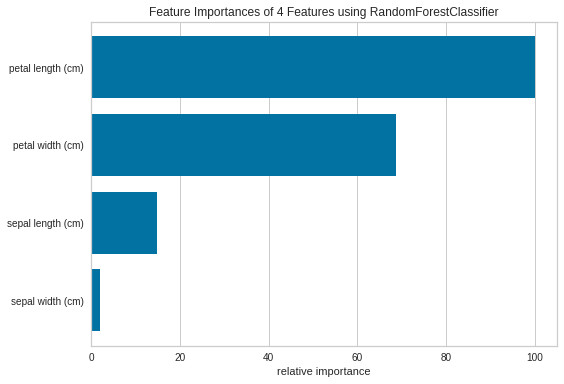

In [0]:
from yellowbrick.features.importances import FeatureImportances

#features names
features = myIris["feature_names"]
# instanciate the feature importance visualizer
FIVisualizer = FeatureImportances(myEstimator, labels=features)
# train the visualizer
FIVisualizer .fit(X, y)
# display the realitive features importance
FIVisualizer.poof("feature_importance.png")


## Comparison of results

* We will see the confusion matrice for our estimator using the **2  most ** important features, and the **2 least** important.

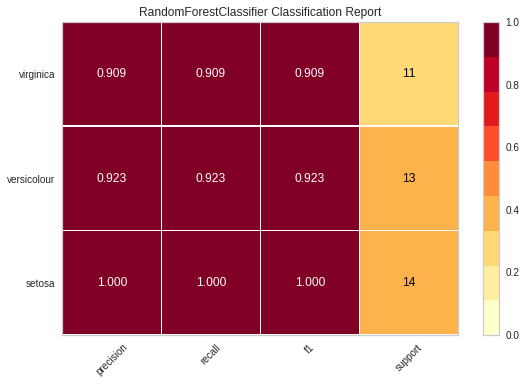

In [0]:
myVisualizer = ClassificationReport(myEstimator, classes=["setosa","versicolour","virginica"],
                                   support=True)
myVisualizer.fit(x_train[:,[2,3]].reshape(-1,2),y_train)
myVisualizer.score(x_test[:,[2,3]].reshape(-1,2),y_test)
myVisualizer.poof(outpath="Confusion_matrix_2features.png")  


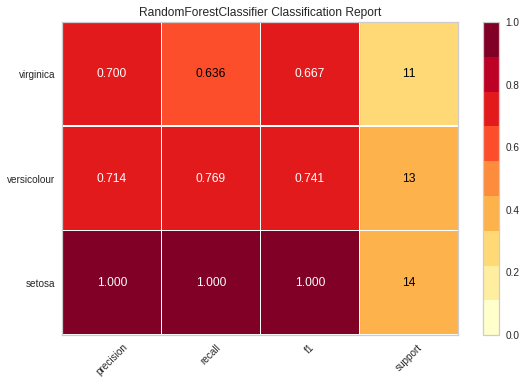

In [0]:
myVisualizer = ClassificationReport(myEstimator, classes=["setosa","versicolour","virginica"],
                                   support=True)
myVisualizer.fit(x_train[:,[0,1]].reshape(-1,2),y_train)
myVisualizer.score(x_test[:,[0,1]].reshape(-1,2),y_test)
myVisualizer.poof(outpath="Confusion_matrix_2features.png")

# 6-Balancing with resampling

## Concept


* An other way to obtain a balanced training set,  is to  **remove** samples from the majority class. Which is called:  **under-sampling**. Or, to **add **new samples belonging to the less represented class. Which is called: **over-sampling**.

* There is a variety of resampling techniques. The library **imbalanced-learn** library implements some of them.

* For a **RandomForest classifier**, it applies: random under-sampling technique with different strategies.

 The default one  is to : resample all classes but the minority class; 


In [0]:
! pip install -U imbalanced-learn


    100% |████████████████████████████████| 174kB 10.6MB/s 


## Example

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class DecisionBoundariesVisualizer is deprecated; Will be moved to yellowbrick.contrib in v0.8
  warnings.warn(msg, category=DeprecationWarning)


<IPython.core.display.Javascript object>

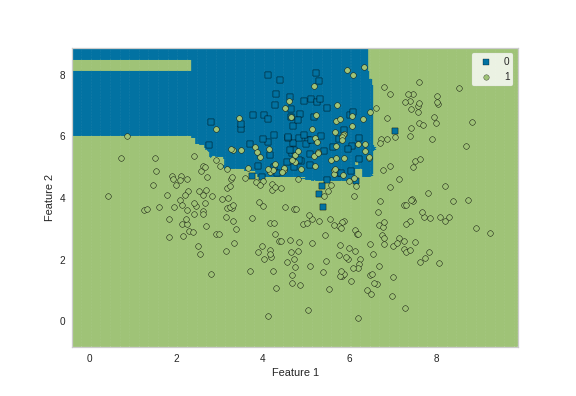

<IPython.core.display.Javascript object>

In [0]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

myBRF3 = BalancedRandomForestClassifier(n_estimators=100, n_jobs=-1,oob_score=True, 
                                        max_depth=4, )
myVis3 = DecisionViz(myBRF3,"Balanced Learning2",features = ["Feature 1","Feature 2"],
                    classes = [0,1])


myVis3.fit(x2_train,y2_train)
myVis3.draw(x2_test, y2_test)
myVis3.poof(outpath="balanced2.png")

from IPython.display import Image
Image(filename='balanced2.png') 


In [0]:
print(classification_report(y2_test,myBRF3.predict(x2_test)))

              precision    recall  f1-score   support

           0       0.50      0.89      0.64        72
           1       0.97      0.79      0.87       303

   micro avg       0.81      0.81      0.81       375
   macro avg       0.73      0.84      0.75       375
weighted avg       0.88      0.81      0.82       375



# References

* Aurélien Géron. Hands-on machine learning with Scikit-Learn and Tensor-Flow: concepts, tools, and techniques to build intelligent systems. O’Reilly Media, Inc, 2017.
* imbalanced learn. User guide. On-line at https://imbalanced-learn.org/en/stable/user_guide.html. Accessed on 09-12-2018.
* Joshi Prateek. Artificial intelligence with Python. Packt Publishing, 2017.
* Alencar Rafael. Resampling strategies for imbalanced datasets. On-line at https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasetsAccessed on 09-12-2018.
* Scikit-learn.org. scikit-learn, machine learning in python. On-line at https://scikit-learn.org/stable/. Accessed on 03-11-2018.
* yellowbrick. Yellowbrick: Machine learning visualization. On-line at http://www.scikit-yb.org/en/latest/. Accessed on 09-12-2018.